In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [2]:
DATADIR = 'datasets/train'
CATEGORIES = ['Ajanta_Caves','Hampi','Khajuraho','Taj_Mahal']
IMG_SIZE=100

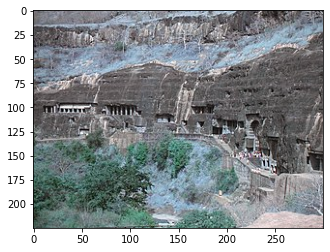

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [5]:
print(len(training_data))

23


In [6]:
lenofimage = len(training_data)

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [8]:
X.shape

(23, 30000)

In [9]:
X = X/255.0

In [17]:
X[1].shape

(30000,)

In [11]:
y=np.array(y)

In [12]:
y.shape

(23,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [15]:
X_test

array([[0.97254902, 1.        , 0.99607843, ..., 0.27843137, 0.38431373,
        0.48627451],
       [0.98823529, 0.96078431, 0.9254902 , ..., 0.71372549, 0.90196078,
        0.95686275],
       [0.52156863, 0.63137255, 0.71372549, ..., 0.49411765, 0.5372549 ,
        0.59607843],
       [0.61960784, 0.4627451 , 0.38823529, ..., 0.44313725, 0.49019608,
        0.54901961],
       [0.85098039, 0.82745098, 0.75294118, ..., 0.01176471, 0.04705882,
        0.00784314],
       [0.5372549 , 0.35294118, 0.15294118, ..., 0.5372549 , 0.62352941,
        0.77647059]])

In [53]:
y2 = svc.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.5


In [55]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2

    accuracy                           0.50         6
   macro avg       0.33      0.38      0.35         6
weighted avg       0.44      0.50      0.47         6



/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [57]:
result

,original,predicted
0,2,2
1,1,2
2,3,3
3,2,0
4,3,3
5,1,2
